## <center> NYC Health datasets

Data on Covid-19 about testing incidence by zip codes (updated at 1st october 2020). Data have been downloaded from NYC Health website.

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
from colorspacious import cspace_converter
from collections import OrderedDict

## <center> Rate of positive tested for Covid-19 in NYC's boroughs per zipcode
    
The percentage of people tested for an antibody test who had positive results per zipcode of residence at 1st october. It is not yet clear whether testing positive for antibodies provides long-term protection from COVID-19.
These maps show the number of people tested with antibody tests by ZIP code of residence, the testing rate per 100,000 people in that ZIP code and the percent of people tested who had positive results.
    
ZCTA: ZIP Code Tabulation Area. A US Census statistical area designed to approximate areal USPS ZIP Codes. They are aggregations of census blocks where a majority of addresses have the same ZIP Code.

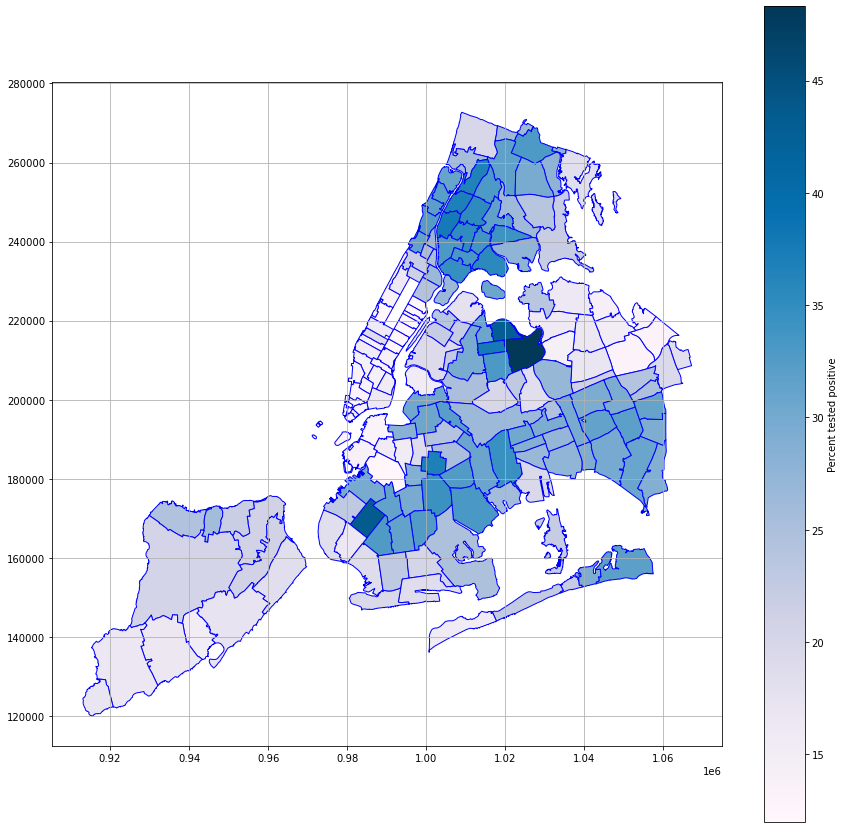

In [3]:
testbyzc = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /coronavirus-data-nychealth-october/testing/antibody-by-modzcta.csv")                       
zipcode_map=gpd.read_file("/home/claudia/Scrivania/Tesi NYC pandemic /ZIP_CODE_040114/ZIP_CODE_040114.shp")
zipcode_map.rename(columns={'ZIPCODE': 'modzcta_first'}, inplace=True) 

zipcode_map['modzcta_first']=pd.to_numeric(zipcode_map['modzcta_first'])
testbyzc['modzcta_first']=pd.to_numeric(testbyzc['modzcta_first'])

nyc_per_zipcodes=pd.merge(zipcode_map,testbyzc, how='left', on= ['modzcta_first', 'modzcta_first']) #merge delle due tabelle dati per 

fig,ax = plt.subplots(figsize=(15,15))
nyc_per_zipcodes.plot(column='PERCENT_POSITIVE', cmap='PuBu', ax=ax, figsize=(8,8), edgecolor='b', legend=True, legend_kwds={'label': "Percent tested positive",'orientation': "vertical"})
plt.grid()


The below map and table provide confirmed case rates and the percent of people tested with a positive result since March 2020 till 1st october 2020. 
This means that low total case number but a high percent of positive cases could reflect more people with 
mild symptoms not getting tested in specific areas: this difference is particularly visible in zipcodes in south Brooklyn, in central zipcodes of Queens and some northen neighboorhoods of Bronx.

(questi dati sono in linea con dati del paper salvato risalente ad aprile 2020.)


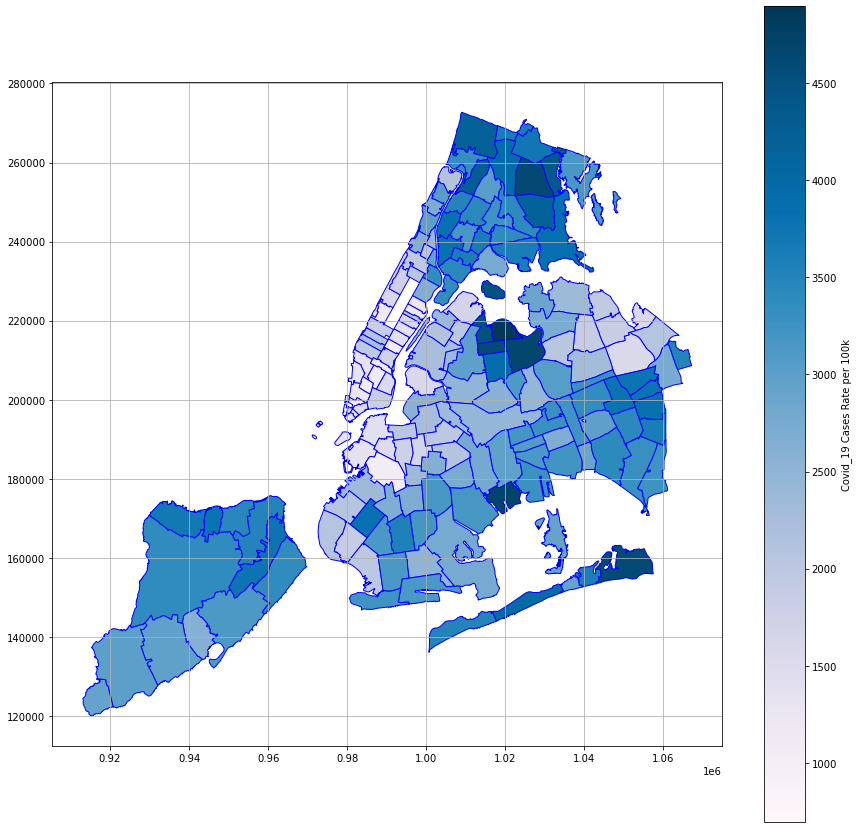

In [4]:
databyzcta=pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /coronavirus-data-nychealth-october/data-by-modzcta.csv")


databyzcta.rename(columns={'MODIFIED_ZCTA': 'modzcta_first'}, inplace=True) 
databyzcta['modzcta_first']=pd.to_numeric(databyzcta['modzcta_first'])
data_per_zipcodes=pd.merge(zipcode_map, databyzcta, how='left', on= ['modzcta_first', 'modzcta_first']) #merge delle due tabelle dati per 

fig,ax = plt.subplots(figsize=(15,15))
data_per_zipcodes.plot(column='COVID_CASE_RATE', cmap='PuBu', ax=ax, figsize=(8,8), edgecolor='b', legend=True, legend_kwds={'label': "Covid_19 Cases Rate per 100k",'orientation': "vertical"})
plt.grid()

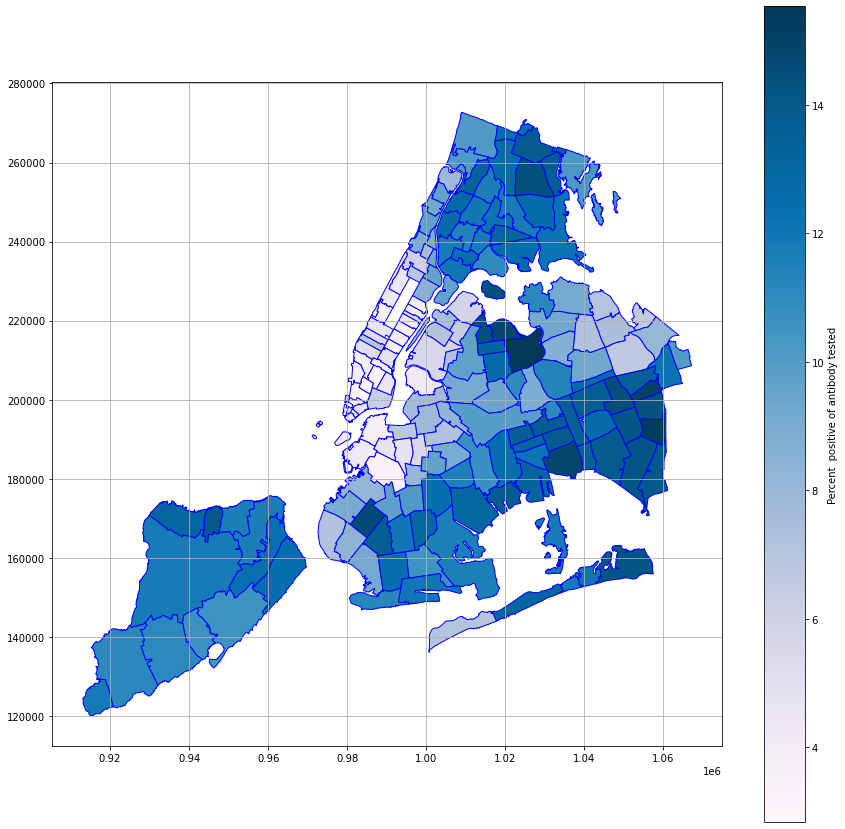

In [5]:
fig,ax = plt.subplots(figsize=(15,15))
data_per_zipcodes.plot(column='PERCENT_POSITIVE', cmap='PuBu', ax=ax, figsize=(8,8), edgecolor='b', legend=True, legend_kwds={'label': "Percent  positive of antibody tested",'orientation': "vertical"})
plt.grid()

The table below shows the recent data of antibody tests updated at 1st october per zipcodes, which means grouped by the residence of the people who underwent the test, for a total number of test of 2154052 in NYC.
An antibody test can find out if you have ever had the virus and these recent data provide a broader picture now that more people without severe illness are getting tested.
Data reported on this table had been got from NYC Health department, COVID-19 Data webpage.

From this plot is evident that more positive results to the tests are positively correlated reasonably to an increasing number of tests carried out, but the trend is slightly different per borough:to analyze these relationships is reasonable to first check the linear correlation between tests carried out and positive cases.

In particular, we see that for the Bronx there's ah higher correlation between people that are tested and result positive to Covid-19 w.r.t Brooklyn data, taking into account the whole scenario of people getting tested.

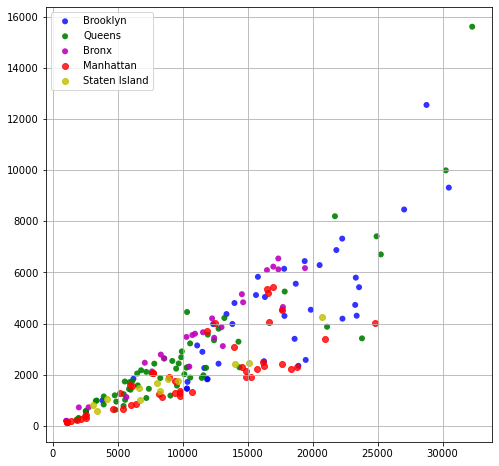

In [6]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Kings"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Kings"].NUM_PEOP_POS, color='b', label='Brooklyn', alpha=0.8, edgecolors='none')
ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Queens"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Queens"].NUM_PEOP_POS, color='g', label='Queens' ,alpha=0.9, edgecolors='none')
ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Bronx"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Bronx"].NUM_PEOP_POS, color='m', label='Bronx' ,alpha=0.9, edgecolors='none')
ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "New York"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "New York"].NUM_PEOP_POS, color='r', label='Manhattan', alpha=0.8)
ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Richmond"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Richmond"].NUM_PEOP_POS, color='y', label='Staten Island', alpha=0.8)

ax.legend(loc='best')
ax.grid()

nyc_per_zipcodes['NUM_PEOP_TEST'].sum(); #numero totale di  antibody tests su nyc

In [7]:
#correlations for the whole set of number of tested people (Pearson's method)
c_dataframe = pd.DataFrame(nyc_per_zipcodes.drop(columns='geometry'))

corr_Brooklyn= c_dataframe[c_dataframe['COUNTY'] == "Kings"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr_Bronx= c_dataframe[c_dataframe['COUNTY'] == "Bronx"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr_Queens=c_dataframe[c_dataframe['COUNTY'] == "Queens"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr_Manhattan= c_dataframe[c_dataframe['COUNTY'] == "New York"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr_Staten_Island= c_dataframe[c_dataframe['COUNTY'] == "Richmond"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']


In [8]:
grouped=c_dataframe.groupby('COUNTY')

num_tested = grouped['NUM_PEOP_TEST'].sum()
num_positive = grouped['NUM_PEOP_POS'].sum()
linear_corr=[corr_Bronx, corr_Brooklyn, corr_Manhattan, corr_Queens, corr_Staten_Island]

#correlation till #of tests 20000
c_dataframe1 = c_dataframe[(c_dataframe['NUM_PEOP_TEST'].astype(float)<=20000)]
grouped1=c_dataframe1.groupby('COUNTY')

corr1_Brooklyn= c_dataframe1[c_dataframe1['COUNTY'] == "Kings"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr1_Bronx= c_dataframe1[c_dataframe1['COUNTY'] == "Bronx"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr1_Queens=c_dataframe1[c_dataframe1['COUNTY'] == "Queens"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr1_Manhattan= c_dataframe1[c_dataframe1['COUNTY'] == "New York"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr1_Staten_Island= c_dataframe1[c_dataframe1['COUNTY'] == "Richmond"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']

num_tested1 = grouped['NUM_PEOP_TEST'].sum()
num_positive1 = grouped['NUM_PEOP_POS'].sum()
linear_corr1=[corr1_Bronx, corr1_Brooklyn, corr1_Manhattan, corr1_Queens, corr1_Staten_Island]

#population data per borough from census gov updated at 2019

nyc_pop=pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Nyc_population_per_borough.csv")

nyc_pop_2019=nyc_pop.iloc[0]

nyc_pop_per_borough=[nyc_pop_2019['Bronx County (Bronx Borough), New York'], nyc_pop_2019['Kings County (Brooklyn Borough), New York'], 
                     nyc_pop_2019['New York County (Manhattan Borough), New York'], nyc_pop_2019['Queens County (Queens Borough), New York'], 
                     nyc_pop_2019['Richmond County (Staten Island Borough), New York'] ]


In [9]:
tab=pd.DataFrame({ 'Borough population' : nyc_pop_per_borough, 'Tot n of tested people (x)': num_tested,
                  'Tot n of positive cases (y)': num_positive,
                  'Lin Correlation between x and y' : linear_corr,'Tot n of positive under 20000 tested (i)': num_positive1,
                  'Lin Correlation between i and limited testing (max of 20000 tests)': linear_corr1 })

tab['Lin Correlation between x and y']=tab['Lin Correlation between x and y']*100
tab['Lin Correlation between x and y']=np.round(tab['Lin Correlation between x and y'], 2)
tab['Lin Correlation between x and y']=tab['Lin Correlation between x and y'].astype(str)+'%'

tab['Lin Correlation between i and limited testing (max of 20000 tests)']=tab['Lin Correlation between i and limited testing (max of 20000 tests)']*100
tab['Lin Correlation between i and limited testing (max of 20000 tests)']=np.round(tab['Lin Correlation between i and limited testing (max of 20000 tests)'], 2)
tab['Lin Correlation between i and limited testing (max of 20000 tests)']=tab['Lin Correlation between i and limited testing (max of 20000 tests)'].astype(str)+'%'

tab

,Borough population,Tot n of tested people (x),Tot n of positive cases (y),Lin Correlation between x and y,Tot n of positive under 20000 tested (i),Lin Correlation between i and limited testing (max of 20000 tests)
COUNTY,,,,,,
Bronx,"1,418,207",302561.0,94699.0,95.94%,94699.0,95.94%
Kings,"2,559,903",649793.0,168565.0,82.25%,168565.0,70.41%
New York,"1,628,706",489626.0,91703.0,82.04%,91703.0,81.15%
Queens,"2,253,858",603224.0,158520.0,89.68%,158520.0,86.35%
Richmond,"476,143",108848.0,20733.0,97.15%,20733.0,96.16%


From this summary table is evident that getting rid of the outlier values (by setting the maximum value of the antibody tests carried out to 20000) can alter the correlation coefficient and allows us to compare the positive percent of tested in the five different borough; the fact that the percentage of positives does not vary much with the limit imposed for the Bronx means that there is a limited number of tests carried out in that borough w.r.t. to Kings (Brooklyn), Manhattan (New York zipcodes) or Queens; for Staten Island the correlation value is very high even with the treshold of 20000 tests, but this is probably due to the number of tests, that corrisponds almost to the 25% of the population (this means an higher percentage of testing in this borough).

## <center> Analysis on socio-demographic data

Now we want to analyze the socio-demographic data related in general to the five different NYC's Boroughs and then go focusing on data from U.S. Census Bureau website and data from American Community Survey regarding  "transportation", up to 2019 version:among there are informations about differences of number of workplaces where workers travel to and percentages of workers that commuting to a different borough w.r.t the one of residence.

Travel time to work (calculated with data of 2014/2018) refers to the total number of minutes that it usually took the person to get from home to work each day during the reference week. The elapsed time includes time spent waiting for public transportation, picking up passengers in carpools, and time spent in other activities related to getting to work.

Mean travel time to work is obtained by dividing the total number of minutes by the number of workers 16 years old and over who did not work at home. Mean travel time to work is rounded to the nearest tenth of a minute.

The margin of error measures the degree of uncertainty caused by sampling error. The margin of error is used with an ACS estimate to construct a confidence interval about the estimate. The interval is formed by adding the margin of error to the estimate (the upper bound) and subtracting the margin of error from the estimate (the lower bound).

21.3% - 0.7% = 20.6% => Lower-bound estimate
21.3% + 0.7% = 22.0% => Upper-bound estimate

We can also look at the total number of locations of employment in the different boroughs and density of population per ages (+16 years old can be workers or employees). 
An establishment is a single physical location at which business is conducted or where services or industrial operations are performed. It is not necessarily identical with a company or enterprise, which may consist of one establishment or more.Establishment counts represent the number of locations with paid employees any time during the year. 
This series per borough excludes government establishments except for wholesale liquor establishments (NAICS 4248), retail liquor stores (NAICS 44531), Book publishers (NAICS 511130), Federally-chartered savings institutions (NAICS 522120), Federally-chartered credit unions (NAICS 522130), and hospitals (NAICS 622).

Looking at data of NYC Planning ("The Ins and Outs of NYC Commuting" released in 2019) based on 2017 ACS 1-year Estimates from U.S. Census Bureau tables data: find out the numbers of workers (by borough residence) that commute to their workplace to other boroughs, different from the one of residence.

One can then look at percent of positive cases in different borough and then look at mobility patterns of workers from their residence location to work: one can suggests reasonably that the higher is the number of workers that travel and reach their work location, the higher can be the number of positive cases to the antibody test that live in a different borough with respect to the one they work in.

In [10]:
social_data=pd.read_csv('/home/claudia/Scrivania/Tesi NYC pandemic /QuickFacts Oct-12-2020.csv')

mean_time_travel=social_data.iloc[43]
travel_time_work =[ mean_time_travel['Bronx County (Bronx Borough), New York'] + ' min',mean_time_travel['Kings County (Brooklyn Borough), New York']+' min',
                   mean_time_travel['New York County (Manhattan Borough), New York']+' min', mean_time_travel['Queens County (Queens Borough), New York']+' min',
                   mean_time_travel['Richmond County (Staten Island Borough), New York']+' min']

#social_data.loc['Mean travel time to work (minutes), workers age 16 years+, 2014-2018' ]

In [11]:
pop_density=social_data.iloc[59]

#population_density per square mile (2010)
population_density=[ pop_density['Bronx County (Bronx Borough), New York'], pop_density['Kings County (Brooklyn Borough), New York'],
                    pop_density['New York County (Manhattan Borough), New York'], pop_density['Queens County (Queens Borough), New York'],
                    pop_density['Richmond County (Staten Island Borough), New York']]

#total employer establishments (2018)
tot_employer_est = social_data.iloc[47]

employer_establishments = [tot_employer_est['Bronx County (Bronx Borough), New York'], tot_employer_est['Kings County (Brooklyn Borough), New York'],
                          tot_employer_est['New York County (Manhattan Borough), New York'], tot_employer_est['Queens County (Queens Borough), New York'],
                          tot_employer_est['Richmond County (Staten Island Borough), New York']]



### <center> From 2019 review on commuting NYC Planning, based on data ACS 1 del 2017

There are 4.2 million employed NYC residents.On average, more than half of employed NYC residents work in their home borough. On average, 53% of NYC residents work within their home borough. 28% of Bronx, Brooklyn, Queens, and Staten Island residents work in Manhattan.
(9% of NYC residents work in Non-Manhattan boroughs outside of their home boroughs. 7% of the employed NYC resident labor force out-commutes to work elsewhere in the NYC Metro Region).
    
Manhattan has the highest share of nonresident workers of the five boroughs, and Staten Island has the lowest.
This means that a large number of workers commute from Bronx, Brooklyn and Queens county to Manhattan, where there are also more employment establishments: so this influences on the data of mean time travel to work, depending on different boroughs residence, that means homeplace and starting point of the travel.


In [12]:
tot_workers_residents = [format(569000,",d"), format(1200000,",d"), format(877000,",d"), format(1100000,",d"), format(207000,",d")]

#number of workers residents with workplace in the same borough and percentage
same_borough_workplace = [format(244670,",d"), format(600000,",d"), format(745450,",d"), format(473000,",d"), format(107640,",d")]
same_borough_workplace_p = [43, 50, 85, 43, 52]

#number of residents in different boroughs with workplace in Manhattan
manhattan_workers = [format(216000,",d"), format(468000,",d"), format(745450,",d"), format(360000,",d"), format(49680,",d")]
manhattan_workers_p = [38, 39, 85, 36, 24]

#percentage having workplace in other boroughs or other departments in New york region
other_places_workers_p = [ 19, 11, 14, 21, 25]


work_tab = pd.DataFrame({'Borough' : ['Bronx','Kings (Brooklyn)','New York (Manhattan)', 'Queens', 'Richmond (Staten Island)'], 'Borough population' : nyc_pop_per_borough,
                        'Population density per square mile (2010)': population_density, 'Employer Establishments': employer_establishments,
                        'Total number of residents employed and workers':tot_workers_residents, 'Residents with workplace in same residence borough': same_borough_workplace ,
                        'Percentage of residents with workplace in same residence borough':same_borough_workplace_p, 'Resident working in Manhattan': manhattan_workers , 
                        'Percentage of workers in Manhattan': manhattan_workers_p, 
                        'Percentage of workers in other boroughs or districts of New York': other_places_workers_p,
                        'Mean time travel to reach the workplace' : travel_time_work})

work_tab['Percentage of residents with workplace in same residence borough']= work_tab['Percentage of residents with workplace in same residence borough'].astype(str)+'%'
work_tab['Percentage of workers in Manhattan']= work_tab['Percentage of workers in Manhattan'].astype(str)+'%'
work_tab['Percentage of workers in other boroughs or districts of New York']= work_tab['Percentage of workers in other boroughs or districts of New York'].astype(str)+'%'

work_tab

#this tab refers to data from NYC Planning review taking data of ACS of 2017, so it would be better to look at numbers on next tab

,Borough,Borough population,Population density per square mile (2010),Employer Establishments,Total number of residents employed and workers,Residents with workplace in same residence borough,Percentage of residents with workplace in same residence borough,Resident working in Manhattan,Percentage of workers in Manhattan,Percentage of workers in other boroughs or districts of New York,Mean time travel to reach the workplace
0,Bronx,"1,418,207","32,903.6","18,309","569,000","244,670",43%,"216,000",38%,19%,44.8 min
1,Kings (Brooklyn),"2,559,903","35,369.1","59,792","1,200,000","600,000",50%,"468,000",39%,11%,42.6 min
2,New York (Manhattan),"1,628,706","69,467.5","102,903","877,000","745,450",85%,"745,450",85%,14%,32.1 min
3,Queens,"2,253,858","20,553.6","50,770","1,100,000","473,000",43%,"360,000",36%,21%,44.1 min
4,Richmond (Staten Island),"476,143","8,030.3","9,435","207,000","107,640",52%,"49,680",24%,25%,44.5 min


### Table regarding demografic data about work, commuting to work, mean time travel for workers (2020)

From Bureau of transportation statistics website, I've download the most recent County Transportation Profile, selecting the five boroughs of interest. This dataset is updated at August 19, 2020 and provides information about number of workers per borough that commute or not to reach their workplace.

in the table, there is the 'mean time travel' mentioned, and these informations have been taken from U.S. Census Bureau website, from Quick-Facts regarding New York City.

Travel time to work and mean travel time to work have been explained in the previous tab (calculated with data of 2014/2018).

I added a last column 'Percentage of workers in Manhattan' using data from NYC Planning ("The Ins and Outs of NYC Commuting" released in 2019) based on 2017 ACS 1-year Estimates from U.S. Census Bureau tables data: this percentage value can be assumed to be a quite good indicator for workers resident in different borough that commute to Manhattan for work reasons (taking into account the margin of error of U.S. Census Bureau data, that measures the degree of uncertainty caused by sampling error) since also numbers of resident workers in the five boroughs hasn't changed significantly from this 2019 review and update of 2020.

In [13]:
transport_data1 = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /County_Transportation_Profiles.csv")

transport_data1.drop(['County FIPS', 'State FIPS', 'Primary and Commercial Airports', 'Non-Commercial -Civil Public Use Airports and Seaplane base',
                     'Non-Commercial -Other Aerodromes', 'Number of Bridges', '% of Poor Condition Bridges', 'Total Docks',
                     'Total Marinas', 'Route miles of freight railroad','% of Medium to Fair Condition Bridges',
                     'Route miles of passenger railroad and rail transit',
                     'Number of workers from other counties who commute to work in the county'], axis='columns', inplace = True)

transport_data2 = transport_data1[(transport_data1['County Name']=='Bronx County') | (transport_data1['County Name']=='Kings County') | (transport_data1['County Name']=='Richmond County') |
                                 (transport_data1['County Name']=='Queens County') | (transport_data1['County Name']=='New York County')]

transport_data = transport_data2[(transport_data2['State Name']=='New York')]
transport_data.drop(['State Name'], axis = 'columns', inplace = True)

transport_data['Percentage of workers that travel to other another borough'] = [54, 48, 11.37, 55.83, 41.8]
transport_data['Percentage of workers that travel to other another borough']= transport_data['Percentage of workers that travel to other another borough'].astype(str)+'%'
transport_data['Percentage of resident workers who commute by transit'] = transport_data['Percent of resident workers who commute by transit'].astype(str)+'%'

transport_data['Percentage of commuting workers to Manhattan (2017)'] = [38, 39, 85, 36, 24]
transport_data['Percentage of commuting workers to Manhattan (2017)']= transport_data['Percentage of commuting workers to Manhattan (2017)'].astype(str)+'%'

transport_data['Mean time travel to reach the workplace']=travel_time_work

transport_data

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-13-28b48a1d89c5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transport_data['Percentage of workers that travel to other another borough'] = [54, 48, 11.37, 55.83, 41.8]
<ipython-input-13-28b48a1d89c5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,County Name,Number of business establishments,Percent of resident workers who commute by transit,Number of resident workers who work at home,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents,Percentage of workers that travel to other another borough,Percentage of resident workers who commute by transit,Percentage of commuting workers to Manhattan (2017),Mean time travel to reach the workplace
1830,Bronx County,18199.0,0.601606,17815.0,306908,239885,560325,1436785,54.0%,0.601606211%,38%,44.8 min
1851,Kings County,58785.0,0.617606,48195.0,559624,579045,1165435,2606850,48.0%,0.617606302%,39%,42.6 min
1858,New York County,103925.0,0.592381,60040.0,99615,739475,875400,1634990,11.37%,0.592380626%,85%,32.1 min
1868,Queens County,50262.0,0.520341,26770.0,609108,462295,1090910,2310010,55.83%,0.520340816%,36%,44.1 min
1870,Richmond County,9387.0,0.301511,5145.0,86412,106425,206775,473325,41.8%,0.301511305%,24%,44.5 min


Looking at this table, one realizes that the borough considered as the epicenter of covid-19 in NYC (New York times article) is the one from the higher percentage of workers travel for work to another borough, comparable to Kings's and Bronx's percentage; and has also a mean time travel to work comparable with Bronx and Richmond County.
In this last case, one should notice that nubers of Staten Island are lower w.r.t the other four counties.

Moreover, looking at the number of business establishments in Manhattan, this almost double the Queen's one: this is this is in accordance with the percentage of workers who move to Manhattan for work reasons.

An establishment is a single physical location at which business is conducted or where services or industrial operations are performed. It is not necessarily identical with a company or enterprise, which may consist of one establishment or more.

Commuting is related to diffusion of Influenza-like Ilness (as it has been demostrated for London underground subway in the paper of december, 2018 : "Analysing the link between public transport use and airborne transmission: mobility and contagion in the London underground") and  correlation of Subway Turnstile Usage and COVID-19 Prevalence in New York City (article august 2020 - Sina Fathi-Kazerooni, Roberto Rojas-Cessa, Ziqian Dong†, and Vatcharapan Umpaichitra).

Evidences of differences in commuting in the five boroughs can be related to differents spatial patterns of the spreading of Covid-19 (see article that justify this difference reconstructing spatial patterns)

Moreover, one should consider the phenomenon of moving from Manhattan's neighboorhoods and from the richest neighborhoods in Kings County that has occured from March 2020 to May 2020, has explained in New york Times article "The Richest Neighborhoods Emptied Out Most as Coronavirus Hit New York City", which has also considered different data sources to reconstruct the fluxes of people outside NYC. The article "DISPARITIES  IN MOBILITY RESPONSES TO COVID-19 " , of Joshua Coven and Arpit Gupta, realtes measured disparities in COVID-19 cases to demographic differences in mobility.


### Socio-demographic informations per zipcodes in NYC 

From Data.Gov website : Demographic Statistics By Zip Code (Metadata Updated: September 16, 2020).

This datasets contain information per zipcode of the gender, ethnicity, pubblic asssistance and citizen status.


In [17]:
stat1 = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Demographic_Statistics_By_Zip_Code.16-09-2020.csv")

stat2 = stat1.loc[stat1['JURISDICTION NAME'].isin(databyzcta['modzcta_first'])]

stat2.drop(['COUNT GENDER UNKNOWN','PERCENT GENDER UNKNOWN', 'COUNT PUBLIC ASSISTANCE UNKNOWN',
            'PERCENT GENDER TOTAL', 'COUNT PACIFIC ISLANDER','PERCENT PACIFIC ISLANDER',
            'COUNT NRECEIVES PUBLIC ASSISTANCE' ], axis='columns', inplace= True)
stat2

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER TOTAL,COUNT HISPANIC LATINO,PERCENT HISPANIC LATINO,COUNT AMERICAN INDIAN,...,COUNT CITIZEN STATUS UNKNOWN,PERCENT CITIZEN STATUS UNKNOWN,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,44,16,0.36,0,...,0,0,44,100,20,0.45,0.55,0,44,100
1,10002,35,19,0.54,16,0.46,35,1,0.03,0,...,0,0,35,100,2,0.06,0.94,0,35,100
2,10003,1,1,1.00,0,0.00,1,0,0.00,0,...,0,0,1,100,0,0.00,1.00,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0.00,0,...,0,0,0,0,0,0.00,0.00,0,0,0
4,10005,2,2,1.00,0,0.00,2,0,0.00,0,...,0,0,2,100,0,0.00,1.00,0,2,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,11436,0,0,0.00,0,0.00,0,0,0.00,0,...,0,0,0,0,0,0.00,0.00,0,0,0
201,11691,37,12,0.32,25,0.68,37,0,0.00,0,...,0,0,37,100,3,0.08,0.92,0,37,100
202,11692,0,0,0.00,0,0.00,0,0,0.00,0,...,0,0,0,0,0,0.00,0.00,0,0,0
203,11693,0,0,0.00,0,0.00,0,0,0.00,0,...,0,0,0,0,0,0.00,0.00,0,0,0


trying another on from NYC Open Data : Demographic statistics broken down by zip code, updated December, 19 2019.
I have the same matching of the previous one, so let's use the most updated.

In [34]:
demo_stat1 = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Demographic_Statistics_By_Zip_Code.csv")
demo_stat2 = demo_stat1.loc[demo_stat1['JURISDICTION NAME'].isin(databyzcta['modzcta_first'])]
#demo_stat2

From NYC Open Data " Demographic Profiles of ACS 5 Year Estimates at the Neighborhood Tabulation Area":
four tables of ACS demographic profiles for 2012 to 2016 at the NTA level.
Four profiles include demographics, economic, housing and sociological, updated March 4, 2020.
Data Provided by Department of City Planning (DCP).

Since these socio-demographic data are estimates at Neighborhood tabulation level, one should match the scheme of neighborhoods that are made of ZIP codes (this geography was created by the Health Department, the United Hospital Fund and were designed for health research, and to be similar to NYC’s Community Districts) and the geography of NTA's, which are made up of census tracts.


In [27]:
data_socio_demographic = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Demographic Profiles_Neighboorhoods_level_4-03-2020/soc_2016acs5yr_nta.xlsx")

data_socio_demographic
data_socio_demographic

,GeoType,GeogName,GeoID,Borough,HH1E,HH1M,HH1C,HH1P,HH1Z,Fam1E,...,OthrE,OthrM,OthrC,OthrP,OthrZ,UnclsNRE,UnclsNRM,UnclsNRC,UnclsNRP,UnclsNRZ
0,NTA2010,Bath Beach,BK27,Brooklyn,11428,209.0,1.1,100.0,NaN,8207,...,15051,1186.0,4.8,45.4,3.1,6697,1100.0,10.0,20.2,3.2
1,NTA2010,Bay Ridge,BK31,Brooklyn,33487,442.0,0.8,100.0,NaN,18935,...,27814,1530.0,3.3,35.1,1.8,7423,806.0,6.6,9.4,1.0
2,NTA2010,Bedford,BK75,Brooklyn,26059,401.0,0.9,100.0,NaN,14540,...,41891,1898.0,2.8,55.6,2.0,9693,1035.0,6.5,12.9,1.3
3,NTA2010,Bensonhurst East,BK29,Brooklyn,22187,338.0,0.9,100.0,NaN,16276,...,34121,1732.0,3.1,53.1,2.3,9077,1007.0,6.7,14.1,1.5
4,NTA2010,Bensonhurst West,BK28,Brooklyn,29909,364.0,0.7,100.0,NaN,21832,...,47340,1974.0,2.5,51.7,1.8,15409,1377.0,5.4,16.8,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,NTA2010,West Concourse,BX63,The Bronx,13095,216.0,1.0,100.0,NaN,8516,...,29227,1478.0,3.1,78.2,2.6,3362,664.0,12.0,9.0,1.7
191,NTA2010,West Farms-Bronx River,BX08,The Bronx,11865,255.0,1.3,100.0,NaN,8115,...,27566,1516.0,3.3,77.1,2.8,2735,530.0,11.8,7.6,1.4
192,NTA2010,Westchester-Unionport,BX59,The Bronx,9073,212.0,1.4,100.0,NaN,6317,...,21988,1318.0,3.6,77.3,3.2,2643,504.0,11.6,9.3,1.7
193,NTA2010,Williamsbridge-Olinville,BX44,The Bronx,21483,292.0,0.8,100.0,NaN,14627,...,28686,1602.0,3.4,44.1,2.1,6252,803.0,7.8,9.6,1.2


In [13]:
zipcodes_map1=gpd.read_file("/home/claudia/Scrivania/Tesi NYC pandemic /ZIP_CODE_040114/ZIP_CODE_040114.shp")

zipcodes_map1


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [21]:
NTA_map =gpd.read_file("/home/claudia/Scrivania/Tesi NYC pandemic /NTA map/geo_export_8a7bb31d-55ab-4573-8cc9-33e2bcc6d23c.shp")
NTA_map

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."
...,...,...,...,...,...,...,...,...
190,2.0,Bronx,005,BX63,West Concourse,1.936954e+07,28550.700370,"POLYGON ((-73.91192 40.84326, -73.91194 40.843..."
191,4.0,Queens,081,QN17,Forest Hills,5.782845e+07,36183.607828,"POLYGON ((-73.83103 40.71434, -73.83115 40.714..."
192,4.0,Queens,081,QN99,park-cemetery-etc-Queens,3.116850e+08,490146.604020,"MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ..."
193,4.0,Queens,081,QN03,Springfield Gardens South-Brookville,4.326375e+07,45266.267875,"POLYGON ((-73.75763 40.66645, -73.75756 40.666..."
